In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import terra
import meerkat as mk
from domino.data.visual_genome import read_vg, ATTRIBUTE_GROUPS
import numpy as np
import pandas as pd
from rich import print
import sys
sys.path.insert(1,'/pd/maya/domino/domino')

### Mimic Slice Eval

In [29]:
from domino.evaluate import run_sdms, run_sdm, score_sdm_explanations, score_sdms
import meerkat.contrib.mimic.gcs
pd.set_option('display.max_rows', 1000)


In [187]:
#setting_dp =run_sdms.out(18285).load() #CLIP
#setting_dp = run_sdms.out(20871).load() #MULTIMODAL
#setting_dp = run_sdms.out(39259).load() #temp mult-emb test
#setting_dp = run_sdms.out(40598).load() #SYNTHETIC CORRELATION
setting_dp = run_sdms.out(46690).load()
setting_dp
#dp, _ = run_sdm.out(18287)
#dp.load()
#np.array(dp.load()['pred_slices'])
#dp, _ = run_sdm.out(run_id=row["run_sdm_run_id"])
#metrics_df = compute_sdm_metrics(dp.load())


,score_model_run_id (NumpyArrayColumn),setting_id (PandasSeriesColumn),build_setting_run_id (NumpyArrayColumn),score_settings_run_id (NumpyArrayColumn),synthetic_preds (NumpyArrayColumn),index (PandasSeriesColumn),alpha (NumpyArrayColumn),build_setting_kwargs (ListColumn),dataset (PandasSeriesColumn),slice_category (PandasSeriesColumn),slice_names (ListColumn),target_name (PandasSeriesColumn),run_sdm_run_id (PandasSeriesColumn),emb_group (PandasSeriesColumn),time_this_iter_s (PandasSeriesColumn),done (PandasSeriesColumn),timesteps_total (PandasSeriesColumn),episodes_total (PandasSeriesColumn),training_iteration (PandasSeriesColumn),experiment_id (PandasSeriesColumn),date (PandasSeriesColumn),timestamp (PandasSeriesColumn),time_total_s (PandasSeriesColumn),pid (PandasSeriesColumn),hostname (PandasSeriesColumn),node_ip (PandasSeriesColumn),time_since_restore (PandasSeriesColumn),timesteps_since_restore (PandasSeriesColumn),iterations_since_restore (PandasSeriesColumn),trial_id (PandasSeriesColumn),sdm_config/weight_y_log_likelihood (PandasSeriesColumn),sdm_config/n_slices (PandasSeriesColumn),sdm_config/emb (PandasSeriesColumn),sdm_config/xmodal_emb (PandasSeriesColumn),config/sdm (PandasSeriesColumn),config/slice (PandasSeriesColumn),logdir (PandasSeriesColumn),sdm_class (PandasSeriesColumn)
0,46671.0,176da5d1-932c-476a-a7f9-9035876ff52e,46671.0,46670.0,True,0,0.03,"{'target_name': 'lung_group', 'slice_name': 'lung_opacity', 'target_frac': 0.5, 'slice_frac': 0.029999999999999995, 'n': 30000}",mimic,rare,['lung_opacity'],lung_group,46697.0,imagenet,25.093029,False,NaN,NaN,1.0,7902d15c1b9e4b03a3644f72dc646cef,2021-09-29_06-21-22,1.632896e+09,25.093029,335559.0,pod-maya,10.92.9.4,25.093029,0.0,1.0,57261_00000,1.0,5.0,emb,emb,"{'sdm_class': '', 'sdm_config': {'emb': ['imagenet', 'emb'], 'n_slices': 5, 'weight_y_log_likelihood': 1, 'xmodal_emb': 'emb'}}","{'alpha': 0.029999999999999995, 'build_setting_kwargs': {'n': 30000, 'slice_frac': 0.029999999999999995, 'slice_name': 'lung_opacity', 'target_frac': 0.5, 'target_name': 'lung_group'}, 'build_setting_run_id': 46671, 'dataset': 'mimic', 'index': '0', 'score_model_run_id': 46671, 'score_settings_run_id': 46670, 'setting_id': '176da5d1-932c-476a-a7f9-9035876ff52e', 'slice_category': 'rare', 'slice_names': ['lung_opacity'], 'synthetic_preds': 'True', 'target_name': 'lung_group'}","/home/sabri/terra/slice/tasks/evaluate/run_sdms/_runs/46690/_evaluate_2021-09-29_06-20-28/_evaluate_57261_00000_0_sdm={'sdm_class': , 'sdm_config': {'weight_y_log_likelihood': 1, '_2021-09-29_06-20-28",domino.sdm.gmm.MixtureModelSDM
1,46671.0,176da5d1-932c-476a-a7f9-9035876ff52e,46671.0,46670.0,True,1,0.03,"{'target_name': 'lung_group', 'slice_name': 'lung_opacity', 'target_frac': 0.5, 'slice_frac': 0.029999999999999995, 'n': 30000}",mimic,rare,['lung_opacity'],lung_group,46698.0,bit,24.302874,False,NaN,NaN,1.0,f29f42f053894b82a707952e34c82417,2021-09-29_06-21-21,1.632896e+09,24.302874,335561.0,pod-maya,10.92.9.4,24.302874,0.0,1.0,57261_00001,1.0,5.0,body,emb,"{'sdm_class': '', 'sdm_config': {'emb': ['bit', 'body'], 'n_slices': 5, 'weight_y_log_likelihood': 1, 'xmodal_emb': 'emb'}}","{'alpha': 0.029999999999999995, 'build_setting_kwargs': {'n': 30000, 'slice_frac': 0.029999999999999995, 'slice_name': 'lung_opacity', 'target_frac': 0.5, 'target_name': 'lung_group'}, 'build_setting_run_id': 46671, 'dataset': 'mimic', 'index': '0', 'score_model_run_id': 46671, 'score_settings_run_id': 46670, 'setting_id': '176da5d1-932c-476a-a7f9-9035876ff52e', 'slice_category': 'rare', 'slice_names': ['lung_opacity'], 'synthetic_preds': 'True', 'target_name': 'lung_group'}","/home/sabri/terra/slice/tasks/evaluate/run_sdms/_runs/46690/_evaluate_2021-09-29_06-20-28/_evaluate_57261_00001_1_sdm={'sdm_class': , 'sdm_config': {'weight_y_log_likelihood': 1, '_2021-09-29_06-20-28",domino.sdm.gmm.MixtureModelSDM
2,46671.0,176da5d1-932c-476a-a7f9-9035876ff52e,46671.0,46670.0,True,2,0.03,"{'target_name': 'lung_group', 'slice_name': 'lung_

In [189]:
#slice_df=score_sdms.out(19177).load() #CLIP
#slice_df = score_sdms.out(21752).load() #MULTIMODAL
#slice_df = score_sdms.out(40360).load() #temporary multi-emb test
#slice_df = score_sdms.out(45159).load() #SYNTHETIC CORRELATION
slice_df = score_sdms.out(46897).load()

In [190]:
slice_df = pd.DataFrame(slice_df)
print(slice_df.shape)
print(len(set(slice_df['slice_name'])))
#slice_df[:100]

(880, 14)

11

In [191]:
score_dp = mk.DataPanel.from_pandas(slice_df)
results_dp = mk.merge(
    score_dp,
    setting_dp["config/sdm", "alpha","run_sdm_run_id"], # include any other columns here you'd like to analyze
    on="run_sdm_run_id"
)
emb_col = results_dp["config/sdm"].map(lambda x: x["sdm_config"]["emb"][0])
results_dp["emb_type"] = emb_col

results_df = results_dp.to_pandas()
results_df


,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target_name,slice_name,index,config/sdm,alpha,emb_type
0,46697,0,0,0.524446,0.0,0.00,0.01,0.000000,0.009901,0.019802,0.000000,0.000000,lung_group,lung_opacity,0,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,imagenet
1,46697,1,0,0.762983,0.0,0.04,0.04,0.019802,0.039604,0.079208,0.792079,0.031923,lung_group,lung_opacity,1,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,imagenet
2,46697,2,0,0.467875,0.0,0.00,0.00,0.000000,0.000000,0.009901,0.029703,0.007673,lung_group,lung_opacity,2,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,imagenet
3,46697,3,0,0.515829,0.0,0.00,0.01,0.000000,0.009901,0.019802,0.029703,0.009772,lung_group,lung_opacity,3,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,imagenet
4,46697,4,0,0.492616,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.148515,0.005714,lung_group,lung_opacity,4,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,imagenet
5,46698,0,0,0.482345,0.0,0.00,0.00,0.000000,0.000000,0.009901,0.267327,0.015455,lung_group,lung_opacity,5,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,bit
6,46698,1,0,0.433628,0.0,0.00,0.01,0.000000,0.009901,0.009901,0.029703,0.004005,lung_group,lung_opacity,6,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,bit
7,46698,2,0,0.433186,0.0,0.00,0.01,0.009901,0.009901,0.029703,0.029703,0.006494,lung_group,lung_opacity,7,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,bit
8,46698,3,0,0.513484,0.0,0.08,0.03,0.029703,0.029703,0.049505,0.376238,0.022093,lung_group,lung_opacity,8,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,bit
9,46698,4,0,0.545473,0.0,0.00,0.03,0.029703,0.029703,0.069307,0.297030,0.025445,lung_group,lung_opacity,9,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,bit


In [199]:
grouped_df = results_df.iloc[results_df.reset_index().groupby(["slice_name", "slice_idx", "alpha", "emb_type"])['precision_at_10'].idxmax().astype(int)]
grouped_df

,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target_name,slice_name,index,config/sdm,alpha,emb_type
466,46798,1,0,0.884273,0.2,0.12,0.10,0.058824,0.117647,0.211765,0.894118,0.028701,lung_group,atelectasis,466,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,bit
473,46800,3,0,0.844947,0.3,0.20,0.13,0.094118,0.152941,0.152941,0.058824,0.033113,lung_group,atelectasis,473,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,clip
441,46794,1,0,0.875857,0.2,0.28,0.11,0.082353,0.129412,0.211765,0.235294,0.029806,lung_group,atelectasis,441,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,imagenet
459,46797,4,0,0.860285,0.3,0.20,0.15,0.094118,0.176471,0.258824,0.764706,0.028322,lung_group,atelectasis,459,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,mimic_multimodal
846,46875,1,0,0.949518,0.6,0.36,0.12,0.270270,0.324324,0.513514,1.000000,0.022996,cardio_group,cardiomegaly,846,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,bit
872,46881,2,0,0.955136,0.4,0.24,0.12,0.243243,0.324324,0.486486,1.000000,0.023125,cardio_group,cardiomegaly,872,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,clip
843,46874,3,0,0.941555,0.3,0.28,0.11,0.216216,0.297297,0.540541,0.567568,0.024970,cardio_group,cardiomegaly,843,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,imagenet
875,46880,0,0,0.909670,0.6,0.40,0.14,0.324324,0.378378,0.459459,0.000000,0.000000,cardio_group,cardiomegaly,875,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,mimic_multimodal
208,46732,3,0,0.877749,0.3,0.20,0.12,0.096386,0.144578,0.216867,0.843373,0.025271,lung_group,consolidation,208,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,bit
194,46729,4,0,0.829410,0.2,0.08,0.09,0.036145,0.108434,0.180723,0.506024,0.026316,lung_group,consolidation,194,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.03,clip


/tmp/ipykernel_1902/1315079358.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['success'] = (grouped_df['auroc']>0.85) & (grouped_df['precision_at_10']>0.2)
/tmp/ipykernel_1902/1315079358.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df["alpha"] = grouped_df["alpha"].round(1)


Text(0.5, 1.0, 'Slice Type: Correlation')

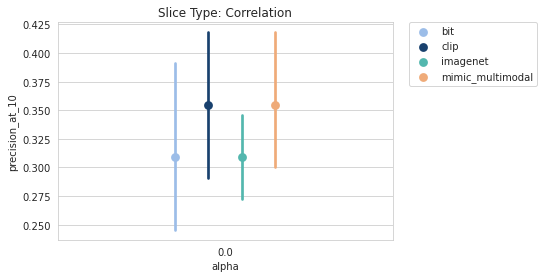

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
#alpha_df = grouped_df[grouped_df['alpha']==0.0]
grouped_df['success'] = (grouped_df['auroc']>0.85) & (grouped_df['precision_at_10']>0.2)
#grouped_df['success'] = (grouped_df['precision_at_25']>0.5)
#sns.barplot(data=grouped_df, x="alpha", y="success", color='orange')
#sns.pointplot(data=grouped_df, x="alpha", y="success", color='darkorange', dodge=True, join=False)
#plt.title('mimic with correlation slices')
palette = ["#9cbde8", "#19416e", "#53b7ae", "#efab79", "#e27e51", "#1b6c7b"]

sns.set_style("whitegrid")
sns.despine()
grouped_df["alpha"] = grouped_df["alpha"].round(1)
sns.pointplot(
    data=grouped_df, hue="emb_type", y="precision_at_10", x="alpha", linestyles="", dodge=0.3, palette=sns.color_palette(palette, 6), 
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Slice Type: Correlation')

#plt.savefig("mimic_correlation.pdf")

In [ ]:
multimodal_df = results_df.iloc[results_df.reset_index().groupby(["slice_name", "slice_idx", "alpha"])['auroc'].idxmax().astype(int)]
multimodal_df[:10]

/tmp/ipykernel_15973/599967079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multimodal_df['success'] = (multimodal_df['auroc']>0.85) & (multimodal_df['precision_at_10']>0.5)
/tmp/ipykernel_15973/599967079.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multimodal_df["alpha"] = multimodal_df["alpha"].round(1)


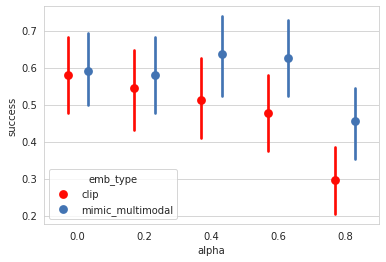

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
#alpha_df = grouped_df[grouped_df['alpha']==0.0]
multimodal_df['success'] = (multimodal_df['auroc']>0.85) & (multimodal_df['precision_at_10']>0.5)
#sns.barplot(data=grouped_df, x="alpha", y="success", color='orange')
#sns.pointplot(data=grouped_df, x="alpha", y="success", color='darkorange', dodge=True, join=False)
#plt.title('mimic with correlation slices')

sns.set_style("whitegrid")
sns.despine()
multimodal_df["alpha"] = multimodal_df["alpha"].round(1)
frames = [grouped_df, multimodal_df]
result = pd.concat(frames)

sns.pointplot(
    data=result, palette=["C0", "C1", "k"], hue='emb_type', color="purple", y="success", x="alpha", linestyles="", dodge=0.3,  
    
)
#sns.pointplot(
#    data=grouped_df, color="darkorange", y="success", x="alpha", linestyles="", dodge=0.3,  
#)
plt.savefig("mimic_correlation.pdf")

### test

In [30]:
from domino.train import score_settings, synthetic_score_settings, train_settings

setting_dp = synthetic_score_settings.out(38439).load()

In [31]:
setting_dp[:20]

,setting_id (PandasSeriesColumn),build_setting_run_id (NumpyArrayColumn),score_model_run_id (NumpyArrayColumn),score_settings_run_id (NumpyArrayColumn),synthetic_preds (NumpyArrayColumn),index (PandasSeriesColumn),alpha (NumpyArrayColumn),build_setting_kwargs (ListColumn),dataset (PandasSeriesColumn),slice_category (PandasSeriesColumn),slice_names (ListColumn),target_name (PandasSeriesColumn)
0,7f631e49-ed3d-4fe5-bfd8-65828b4f2987,38440.0,38440.0,38439.0,True,0,0.0,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.0}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atelectasis
1,765e0bd2-2c6e-48c2-a4ee-e04b23bd929a,38441.0,38441.0,38439.0,True,1,0.2,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.2}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atelectasis
2,2b6f38ca-420d-454d-9ad3-bff22f682d52,38442.0,38442.0,38439.0,True,2,0.4,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.4}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atelectasis
3,9193d4e4-d014-4645-bc54-1fcbcad1e9fc,38443.0,38443.0,38439.0,True,3,0.6,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.6000000000000001}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atelectasis
4,fbde748b-2b20-4c07-891d-f7d11d222f7b,38444.0,38444.0,38439.0,True,4,0.8,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.8}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atelectasis
...,...,...,...,...,...,...,...,...,...,...,...,...
15,742b626e-2989-48c3-91c9-be4f47c37ed8,38462.0,38462.0,38439.0,True,15,0.0,"{'n': 30000, 'correlate': 'support_devices', 'target': 'atelectasis', 'corr': 0.0}",mimic,correlation,"['atelectasis=0_support_devices=1', 'atelectasis=1_support_devices=0']",atelectasis
16,b06b1e57-aac5-4459-a1a6-699b38e2ea83,38463.0,38463.0,38439.0,True,16,0.2,"{'n': 30000, 'correlate': 'support_devices', 'target': 'atelectasis', 'corr': 0.2}",mimic,correlation,"['atelectasis=0_support_devices=1', 'atelectasis=1_support_devices=0']",atelectasis
17,c93e7244-2026-4e77-a21b-183d10315732,38176.0,38176.0,38439.0,True,17,0.4,"{'n': 30000, 'correlate': 'support_devices', 'target': 'atelectasis', 'corr': 0.4}",mimic,correlation,"['atelectasis=0_support_devices=1', 'atelectasis=1_support_devices=0']",atelectasis
18,e31202e9-1606-4f26-8aeb-571cd47346b4,38464.0,38464.0,38439.0,True,18,0.6,"{'n': 30000, 'correlate': 'support_devices', 'target': 'atelectasis', 'corr': 0.6000000000000001}",mimic,correlation,"['atelectasis=0_support_devices=1', 'atelectasis=1_support_devices=0']",atelectasis


## Compute Baseline Distributions

In [64]:
a = mk.DataPanel.read("/pd/maya/mimic_dp_adjusted_diagnoses.mk")
a.shape

(377110, 67)

In [68]:
dicom_ids = list(a.lz[a['slice_assigned_split']=='test']['dicom_id'])

In [69]:
import numpy as np

In [70]:
from domino.slices.abstract import build_setting

,subject_id (PandasSeriesColumn),dicom_id (PandasSeriesColumn),study_id (PandasSeriesColumn),dicom_path (PandasSeriesColumn),gender (PandasSeriesColumn),anchor_age (PandasSeriesColumn),anchor_year (PandasSeriesColumn),anchor_year_group (PandasSeriesColumn),dod (PandasSeriesColumn),dicom (PandasSeriesColumn),study_date (PandasSeriesColumn),image_type (PandasSeriesColumn),table_type (PandasSeriesColumn),distance_source_to_detector (PandasSeriesColumn),distance_source_to_patient (PandasSeriesColumn),exposure (PandasSeriesColumn),exposure_time (PandasSeriesColumn),x_ray_tube_current (PandasSeriesColumn),field_of_view_rotation (PandasSeriesColumn),field_of_view_origin (PandasSeriesColumn),field_of_view_horizontal_flip (PandasSeriesColumn),view_position (PandasSeriesColumn),patient_orientation (PandasSeriesColumn),burned_in_annotation (PandasSeriesColumn),requesting_service (PandasSeriesColumn),detector_primary_angle (PandasSeriesColumn),detector_element_physical_size (PandasSeriesColumn),report_path (PandasSeriesColumn),hadm_id (PandasSeriesColumn),admittime (PandasSeriesColumn),dischtime (PandasSeriesColumn),deathtime (PandasSeriesColumn),admission_type (PandasSeriesColumn),admission_location (PandasSeriesColumn),discharge_location (PandasSeriesColumn),insurance (PandasSeriesColumn),language (PandasSeriesColumn),marital_status (PandasSeriesColumn),ethnicity (PandasSeriesColumn),edregtime (PandasSeriesColumn),edouttime (PandasSeriesColumn),hospital_expire_flag (PandasSeriesColumn),index (PandasSeriesColumn),jpg_path (PandasSeriesColumn),cxr_jpg (GCSImageColumn),cxr_dicom (GCSImageColumn),cxr_jpg_1024 (ImageColumn),atelectasis (PandasSeriesColumn),cardiomegaly (PandasSeriesColumn),consolidation (PandasSeriesColumn),edema (PandasSeriesColumn),enlarged_cardiomediastinum (PandasSeriesColumn),fracture (PandasSeriesColumn),lung_lesion (PandasSeriesColumn),lung_opacity (PandasSeriesColumn),no_finding (PandasSeriesColumn),pleural_effusion (PandasSeriesColumn),pleural_other (PandasSeriesColumn),pneumonia (PandasSeriesColumn),pneumothorax (PandasSeriesColumn),support_devices (PandasSeriesColumn),finding_group (PandasSeriesColumn),lung_group (PandasSeriesColumn),pleural_group (PandasSeriesColumn),cardio_group (PandasSeriesColumn),slice_assigned_split (PandasSeriesColumn),slices (NumpyArrayColumn),target (NumpyArrayColumn),correlate (NumpyArrayColumn),input (ImageColumn),id (PandasSeriesColumn),split (PandasSeriesColumn),probs (TensorColumn)
0,15725162,98d069df-340c87c5-e2010906-de830025-7394f440,53515511,files/p15/p15725162/s53515511/98d069df-340c87c5-e2010906-de830025-7394f440.dcm,F,61.0,2143.0,2011 - 2013,None,98d069df-340c87c5-e2010906-de830025-7394f440,21430812.0,"['DERIVED', 'PRIMARY']",TILTING,NaN,NaN,4.0,14.0,320.0,NaN,None,None,AP,"['L', 'F']",YES,CSURG,NaN,"['0.139', '0.139']",files/p15/p15725162/s53515511.txt,25870067.0,2143-08-12 07:15:00,2143-08-16 17:00:00,NaT,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,DIVORCED,WHITE,NaT,NaT,0.0,37371,files/p15/p15725162/s53515511/98d069df-340c87c5-e2010906-de830025-7394f440.jpg,LambdaCell,LambdaCell,,0,0,0,0,1,0,0,0,0,0,0,0,0,1,True,False,False,True,test,"np.ndarray(shape=(2,))",0,0,,98d069df-340c87c5-e2010906-de830025-7394f440,test,torch.Tensor(shape=torch.Size([2]))
1,19926992,c9b79543-1c3c959b-1984d4e3-ddf3ea05-26a37c8c,53302487,files/p19/p19926992/s53302487/c9b79543-1c3c959b-1984d4e3-ddf3ea05-26a37c8c.dcm,F,91.0,2158.0,2014 - 2016,None,c9b79543-1c3c959b-1984d4e3-ddf3ea05-26a37c8c,21580529.0,"['DERIVED', 'PRIMARY']",FIXED,0.0,NaN,4.0,5.0,800.0,NaN,None,None,AP,"['L', 'F']",NO,EU,NaN,"['0.139', '0.139']",files/p19/p19926992/s53302487.txt,23088200.0,2158-05-29 20:20:00,2158-06-02 15:55:00,NaT,EW EMER.,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,ENGLISH,WIDOWED,WHITE,2158-05-29 15:12:00,2158-05-29 21:55:00,0.0,64903,files/p19/p19926992/s53302487/c9b79543-1c3c959b-1984d4e3-ddf3ea05-26a37c8c.jpg,LambdaCell,LambdaCell,,0,0,0,0,0,0,0,0,0,1,0,0,0,0,True,False,T
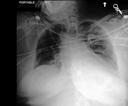
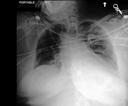
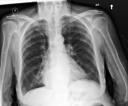
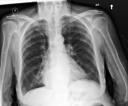
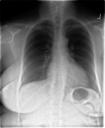
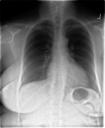
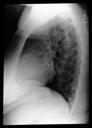
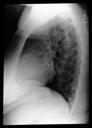
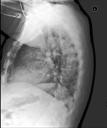
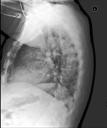

In [119]:
build_setting_dp = build_setting.out(40368).load()
build_setting_dp.head()

In [78]:
dicoms = list(build_setting_dp.lz[build_setting_dp['split']=='test']['dicom_id'])

In [80]:
build_setting_dp.shape

(29998, 73)

In [125]:
baseline_precision = []
for i in range(1000):
    idx = np.random.choice(build_setting_dp.shape[0], 25, replace=True)
    a = np.array(build_setting_dp.lz[idx]['atelectasis'])
    c = np.array(build_setting_dp.lz[idx]['cardiomegaly'])
    baseline_precision.append(np.sum(np.logical_and(a==0,c==1))/25)
print(np.mean(baseline_precision), np.std(baseline_precision))

0.13988 0.06946643506039446